**1. Libraries Loading**

In [ ]:
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
%matplotlib inline
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

**2. Gathering Data**

#  1. Twitter Archive:

In [ ]:
Archive = pd.read_csv('twitter-archive-enhanced.csv', encoding = 'utf-8')



```
# This is formatted as code
```

  2. Image Predictions:

In [ ]:
URL = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(URL)

with open('image-predictions.tsv', mode ='wb') as file:
    file.write(response.content)

*italicized text*  3. Twitter API:

In [ ]:
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# API_list is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = API_list.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

NameError: ignored

In [ ]:
df_TwitterAPI=[]

with open("tweet_json.txt") as file:
    for line in file:
      df_TwitterAPI.append(json.loads(line))

print(df_TwitterAPI[0])

{'created_at': 'Tue Aug 01 16:23:56 +0000 2017', 'id': 892420643555336193, 'id_str': '892420643555336193', 'full_text': "This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU", 'truncated': False, 'display_text_range': [0, 85], 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'url': 'https://t.co/MgUWQ76dJU', 'display_url': 'pic.twitter.com/MgUWQ76dJU', 'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'medium': {'w': 540, 'h': 528, 'resize': 'fit'}, 'small': {'w': 540, 'h': 528, 'resize': 'fit'}, 'large': {'w': 540, 'h': 528, 'resize': 'fit'}}}]}, 'extended_entities': {'media

In [ ]:
TweetData=pd.DataFrame(df_TwitterAPI,columns=['id',
                                             'favorite_count',
                                             'retweet_count'])
TweetData.head()

,id,favorite_count,retweet_count
0,892420643555336193,38089,8330
1,892177421306343426,32679,6154
2,891815181378084864,24595,4073
3,891689557279858688,41449,8474
4,891327558926688256,39623,9167


In [ ]:
TweetData=TweetData.rename(columns={'id':'tweet_id'})
TweetData.head()

,tweet_id,favorite_count,retweet_count
0,892420643555336193,38089,8330
1,892177421306343426,32679,6154
2,891815181378084864,24595,4073
3,891689557279858688,41449,8474
4,891327558926688256,39623,9167


In [ ]:
# save Dataframe to csv file
TweetData.to_csv('TweetData..csv',index=False)

In [ ]:
#check saving:
savedfile=pd.read_csv('TweetData..csv')
savedfile.head()

,tweet_id,favorite_count,retweet_count
0,892420643555336193,38089,8330
1,892177421306343426,32679,6154
2,891815181378084864,24595,4073
3,891689557279858688,41449,8474
4,891327558926688256,39623,9167


**3. Assessing Data**

Before cleaning, it is essential to assess data to inspect what to clean. In this process, two issues are concerned:
- data quality issue
- data tidiness issue

The assessment can be done **visually** and **programatically**.

  **First:** Assessing Data Archive:

In [ ]:
Archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [ ]:
Archive.sample(20)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1137,728046963732717569,NaN,NaN,2016-05-05 02:21:37 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Raymond. He controls fountains with hi...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/728046963...,11,10,Raymond,None,None,None,None
624,795464331001561088,NaN,NaN,2016-11-07 03:14:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Elder doggo does a splash. Both 13/10 incredib...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/795464331...,13,10,None,doggo,None,None,None
665,790698755171364864,NaN,NaN,2016-10-24 23:37:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Mosby. He appears to be rather h*ckin ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/790698755...,12,10,Mosby,None,None,None,None
1107,734776360183431168,NaN,NaN,2016-05-23 16:01:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Livvie. Someone should tell her it's b...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/734776360...,11,10,Livvie,None,None,None,None
72,878604707211726852,NaN,NaN,2017-06-24 13:24:20 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Martha is stunning how h*ckin dare you. 13/10 ...,NaN,NaN,NaN,https://twitter.com/bbcworld/status/8785998685...,13,10,None,None,None,None,None
1636,684200372118904832,NaN,NaN,2016-01-05 02:30:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Gang of fearless hoofed puppers here. Straight...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/684200372...,6,10,None,None,None,None,None
492,813217897535406080,NaN,NaN,2016-12-26 03:00:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is Atlas. He went all out this year. 13/1...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/813217897...,13,10,Atlas,None,None,None,None
672,789903600034189313,NaN,NaN,2016-10-22 18:57:48 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",This is Ralphy. His dreams were just shattered...,NaN,NaN,NaN,https://vine.co/v/5wPT1aBxPQZ,13,10,Ralphy,None,None,pupper,None
589,799308762079035393,NaN,NaN,2016-11-17 17:50:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: I WAS SENT THE ACTUAL DOG IN TH...,7.743144e+17,4.196984e+09,2016-09-09 18:31:54 +0000,https://twitter.com/dog_rates/status/774314403...,14,10,None,None,None,None,None
384,826958653328592898,NaN,NaN,2017-02-02 01:01:21 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Loki. He smiles like Elvis. Ain't noth...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/826958653...,12,10,Loki,doggo,None,None,None


In [ ]:
Archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [ ]:
Archive.rating_numerator.describe()

count    2356.000000
mean       13.126486
std        45.876648
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max      1776.000000
Name: rating_numerator, dtype: float64

In [ ]:
#Tweets with less than 10 ratings count:
Archive[Archive.rating_numerator<10].count()[0]

440

In [ ]:
#Tweets rated above 10 count:
Archive[Archive.rating_numerator>10].count()[0]

1455

In [ ]:
#Tweets rated equal 10 count:
Archive[Archive.rating_numerator==10].count()[0]

461

In [ ]:
#Tweets with less than 10 ratings tweet_ids:
Archive[Archive.rating_numerator<10].tweet_id.head()

45     883482846933004288
229    848212111729840128
315    835152434251116546
387    826598799820865537
462    817502432452313088
Name: tweet_id, dtype: int64

In [ ]:
#check an example from tweets with less than 10 ratings:
Archive.loc[(Archive.tweet_id==826598799820865537),'rating_numerator']

387    7
Name: rating_numerator, dtype: int64

In [ ]:
Archive.text[387]

"I was going to do 007/10, but the joke wasn't worth the &lt;10 rating"

In [ ]:
#Supposed return 0
Archive.tweet_id.duplicated().sum()

0

In [ ]:
Archive.rating_denominator.describe()

count    2356.000000
mean       10.455433
std         6.745237
min         0.000000
25%        10.000000
50%        10.000000
75%        10.000000
max       170.000000
Name: rating_denominator, dtype: float64

In [ ]:
Archive[Archive.rating_denominator==0].tweet_id

313    835246439529840640
Name: tweet_id, dtype: int64

In [ ]:
Archive.loc[313,'text']

"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho"

In [ ]:
Archive[Archive.rating_denominator!=10].count()[0]

23

In [ ]:
Archive[Archive.rating_denominator!=10].tweet_id.head()

313    835246439529840640
342    832088576586297345
433    820690176645140481
516    810984652412424192
784    775096608509886464
Name: tweet_id, dtype: int64

In [ ]:
Archive.name.sample(50)

225            Kevin
570             None
70              Beau
1573            Marq
483           Cooper
1515            None
2179          Tucker
530             Milo
660            Mabel
2206            Zeek
2178            None
2065            None
310             None
85             Venti
2243    Cleopatricia
463              Ken
1335         Jimothy
334             None
181             Zeke
295          Vincent
870             None
1306            None
1298            None
1592            None
1753            None
401           Wilson
1052        Maxaroni
1865            None
884            Sadie
1741             Evy
1284            Bear
1353            None
333           Willow
252            Brady
2001           light
236           Furzey
639             None
780           Anakin
1328            Lucy
1972            None
544            Major
1740          Dwight
759               an
684             None
12              None
2253            None
2185            Ruby
1464         

  **Second:** Assessing Image Predictions


In [ ]:
Predictions=pd.read_csv('image-predictions.tsv',sep='\t')
Predictions.info

<bound method DataFrame.info of                 tweet_id  ... p3_dog
0     666020888022790149  ...   True
1     666029285002620928  ...   True
2     666033412701032449  ...   True
3     666044226329800704  ...   True
4     666049248165822465  ...   True
...                  ...  ...    ...
2070  891327558926688256  ...   True
2071  891689557279858688  ...  False
2072  891815181378084864  ...   True
2073  892177421306343426  ...   True
2074  892420643555336193  ...  False

[2075 rows x 12 columns]>

In [ ]:
Predictions.sample(20)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
243,670452855871037440,https://pbs.twimg.com/media/CU3tUC4WEAAoZby.jpg,1,Arctic_fox,0.188174,False,indri,0.123584,False,malamute,0.080379,True
1259,748699167502000129,https://pbs.twimg.com/media/CmPp5pOXgAAD_SG.jpg,1,Pembroke,0.849029,True,Cardigan,0.083629,True,kelpie,0.024394,True
285,671147085991960577,https://pbs.twimg.com/media/CVBktzQXAAAPpUA.jpg,1,Yorkshire_terrier,0.467202,True,cairn,0.440122,True,silky_terrier,0.058690,True
1807,832397543355072512,https://pbs.twimg.com/media/C41FIiAW8AA7lMr.jpg,1,Pekinese,0.988916,True,Brabancon_griffon,0.001677,True,Siamese_cat,0.001126,False
1576,796080075804475393,https://pbs.twimg.com/media/Cww-msrXcAAxm3K.jpg,1,chow,0.973846,True,Tibetan_mastiff,0.014110,True,gibbon,0.002358,False
1414,771014301343748096,https://pbs.twimg.com/media/CrMxZzgWIAQUxzx.jpg,1,meerkat,0.202335,False,doormat,0.111790,False,macaque,0.088925,False
1619,802624713319034886,https://pbs.twimg.com/media/CsrjryzWgAAZY00.jpg,1,cocker_spaniel,0.253442,True,golden_retriever,0.162850,True,otterhound,0.110921,True
2066,890609185150312448,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,1,Irish_terrier,0.487574,True,Irish_setter,0.193054,True,Chesapeake_Bay_retriever,0.118184,True
766,689154315265683456,https://pbs.twimg.com/media/CZBeMMVUwAEdVqI.jpg,1,cocker_spaniel,0.816044,True,golden_retriever,0.054135,True,Airedale,0.030648,True
1182,738402415918125056,https://pbs.twimg.com/media/Cj9VEs_XAAAlTai.jpg,1,cocker_spaniel,0.346695,True,Blenheim_spaniel,0.193905,True,Chihuahua,0.078000,True


In [ ]:
Predictions.jpg_url.count()

2075

In [ ]:
#it predict image as doormat
Predictions.loc[106,'jpg_url']

'https://pbs.twimg.com/media/CUS9PlUWwAANeAD.jpg'

In [ ]:
from IPython.display import Image
Image(url='https://pbs.twimg.com/media/CUS9PlUWwAANeAD.jpg')

  **Third:** Assessing Twitter API:



In [ ]:
TweetData.head()

,tweet_id,favorite_count,retweet_count
0,892420643555336193,38089,8330
1,892177421306343426,32679,6154
2,891815181378084864,24595,4073
3,891689557279858688,41449,8474
4,891327558926688256,39623,9167


In [ ]:
TweetData.sample(20)

,tweet_id,favorite_count,retweet_count
2187,668641109086707712,1098,553
1384,699691744225525762,10773,4902
703,783839966405230592,32163,11841
1877,674752233200820224,1502,486
2215,668226093875376128,305,106
1058,739932936087216128,4249,1154
880,759197388317847553,6416,2107
1991,672264251789176834,1166,347
2036,671486386088865792,589,211
394,824025158776213504,5066,641


In [ ]:
TweetData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2340 entries, 0 to 2339
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2340 non-null   int64
 1   favorite_count  2340 non-null   int64
 2   retweet_count   2340 non-null   int64
dtypes: int64(3)
memory usage: 55.0 KB


**Tidiness:**

*   Most tweets don't specify the dog_stage.
*   All data is related but separated into 3 dataframes






**Quality:**

1.	Timestamp column has dates in string form.
2.	Rating_numerator & Rating_denominator columns should be float.
3.	Row 313 has 0 denominator
4.	Not all tweets contain photos.(2075 entries of 2356)
5.	underscores are used in many names in columns p1,p2,p3 instead of spaces.
6.	Not all tweets didn't include the dog's name correctly. ex(rows:570,2065,310 name = None & row:759 name = an)
7.	There are 78 reply tweets
8.	Not all tweets start with uppercase letters.
9.	Tweet_id column has ids in int64 form which we don't need to have this type because there are no mathematical operations on it.


# **4. Cleaning Data:**




 **First. Copy Dataframes:**

In [ ]:
C_Archive=Archive.copy()
C_Predictions=Predictions.copy()
C_TweetData=TweetData.copy()

In [ ]:
C_Archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [ ]:
C_Predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [ ]:
C_TweetData.head()

,tweet_id,favorite_count,retweet_count
0,892420643555336193,38089,8330
1,892177421306343426,32679,6154
2,891815181378084864,24595,4073
3,891689557279858688,41449,8474
4,891327558926688256,39623,9167


 **Second. Clean Tidiness:**

1. Most tweets don't specify the dog_stage.

**Define:**

  Merge 4 columns to 1 columns Called Stage

**Code:**

In [ ]:
C_Archive['Stage']=C_Archive['text'].str.extract('(doggo|floofer|pupper|puppo)')
C_Archive.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,Stage
775,776201521193218049,NaN,NaN,2016-09-14 23:30:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is O'Malley. That is how he sleeps. Doesn...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/776201521...,10,10,O,None,None,None,None,NaN
1808,676897532954456065,NaN,NaN,2015-12-15 22:52:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Exotic handheld dog here. Appears unathletic. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/676897532...,5,10,None,None,None,None,None,NaN
1930,674038233588723717,NaN,NaN,2015-12-08 01:30:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Kaiya. She's an aspiring shoe model. 1...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/674038233...,12,10,Kaiya,None,None,pupper,None,pupper
358,830097400375152640,NaN,NaN,2017-02-10 16:53:37 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Samson. He's absolute fluffy perfection. ...,NaN,NaN,NaN,"https://www.gofundme.com/sick-baby-samson,http...",13,10,Samson,None,None,None,None,NaN
378,827933404142436356,NaN,NaN,2017-02-04 17:34:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Kona. Yesterday she stopped by the dep...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/827933404...,12,10,Kona,None,None,pupper,None,pupper
1355,703611486317502464,NaN,NaN,2016-02-27 16:03:45 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Scooter. He's experiencing the pupper equ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/703611486...,10,10,Scooter,None,None,pupper,None,pupper
1467,694329668942569472,NaN,NaN,2016-02-02 01:21:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Grady. He's very hungry. Too bad no one c...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/694329668...,9,10,Grady,None,None,pupper,None,pupper
1117,732375214819057664,NaN,NaN,2016-05-17 01:00:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Kyle (pronounced 'Mitch'). He strives ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/732375214...,11,10,Kyle,doggo,None,None,None,doggo
462,817502432452313088,NaN,NaN,2017-01-06 22:45:43 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Herschel. He's slightly bi...,6.924173e+17,4.196984e+09,2016-01-27 18:42:06 +0000,https://twitter.com/dog_rates/status/692417313...,7,10,Herschel,None,None,pupper,None,pupper
1830,676219687039057920,NaN,NaN,2015-12-14 01:58:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Kenneth. He's stuck in a bubble. 10/10...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/676219687...,10,10,Kenneth,None,None,None,None,NaN


In [ ]:
C_Archive=C_Archive.drop(columns=['doggo','floofer','pupper','puppo'])

**Test:**

In [ ]:
C_Archive.Stage.value_counts()

pupper     265
doggo       93
puppo       37
floofer      4
Name: Stage, dtype: int64

2. All data is related but separated into 3 dataframes

**Define:**

Merge dataframes into 1 dataframe based on Tweet_id

**Code:**

In [ ]:
C_Archive=pd.merge(C_Archive,C_Predictions,on='tweet_id',how='left')
C_Archive=pd.merge(C_Archive,C_TweetData,on='tweet_id',how='left')

**Test:**

In [ ]:
C_Archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  Stage                       399 n

In [ ]:
# C_Predictions dataframe contain jpg_url columns and C_Archive didn't before merge 
# but after merge C_Archive should have jpg_url columns
C_Archive.jpg_url.count()

2075

**Third. Clean Quality:**

1. Timestamp column has dates in string form.




**Define:**

Convert invalid datatype  of timestamp column to datatime

**Code:**

In [ ]:
C_Archive.timestamp=pd.to_datetime(C_Archive.timestamp)

**Test:**

In [ ]:
C_Archive.timestamp.head()

0   2017-08-01 16:23:56+00:00
1   2017-08-01 00:17:27+00:00
2   2017-07-31 00:18:03+00:00
3   2017-07-30 15:58:51+00:00
4   2017-07-29 16:00:24+00:00
Name: timestamp, dtype: datetime64[ns, UTC]

2. Rating_numerator & Rating_denominator columns should be float.


**Define:**

Convert invalid datatype of Rating_numerator & Rating_denominator columns that should be float


**Code:**

In [ ]:
C_Archive.rating_numerator=C_Archive.rating_numerator.astype(float)
C_Archive.rating_denominator=C_Archive.rating_denominator.astype(float)

**Test:**

In [ ]:
C_Archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   int64              
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   object             
 5   text                        2356 non-null   object             
 6   retweeted_status_id         181 non-null    float64            
 7   retweeted_status_user_id    181 non-null    float64            
 8   retweeted_status_timestamp  181 non-null    object             
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2356 non-null   float64         

3. Row 313 has 0 denominator

**Define:**

Manual fix entry 313 has rating_denominator 0 replace to 10 

**Code:**

In [ ]:
#check tweet id of entry 313:
Archive.tweet_id[313]

835246439529840640

In [ ]:
C_Archive.loc[313,'rating_denominator'] = 10

**Test:**

In [ ]:
C_Archive.rating_denominator[313]

10.0

4. Not all tweets contain photos.(2075 entries of 2356)

**Define:**

Drop all tweets that doesn't contain pictures of dogs

**Code:**

In [ ]:
C_Archive=C_Archive[C_Archive.jpg_url.notnull()]

**Test:**

In [ ]:
C_Archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 0 to 2355
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2075 non-null   float64            
 1   in_reply_to_status_id       23 non-null     float64            
 2   in_reply_to_user_id         23 non-null     float64            
 3   timestamp                   2075 non-null   datetime64[ns, UTC]
 4   source                      2075 non-null   object             
 5   text                        2075 non-null   object             
 6   retweeted_status_id         81 non-null     float64            
 7   retweeted_status_user_id    81 non-null     float64            
 8   retweeted_status_timestamp  81 non-null     object             
 9   expanded_urls               2075 non-null   object             
 10  rating_numerator            2075 non-null   float64         

5. underscores are used in many names in columns p1,p2,p3 instead of spaces.

**Define:**

replace names that contain underscores to spaces

**Code:**

In [ ]:
C_Archive.p1=C_Archive.p1.str.replace('_',' ')
C_Archive.p2=C_Archive.p2.str.replace('_',' ')
C_Archive.p3=C_Archive.p3.str.replace('_',' ')

**Test:**

In [ ]:
C_Archive.p1.head()

0         orange
1      Chihuahua
2      Chihuahua
3    paper towel
4         basset
Name: p1, dtype: object

In [ ]:
C_Archive.p2.sample(3)

1174     redbone
2203         pug
1694    Pekinese
Name: p2, dtype: object

In [ ]:
C_Archive.p3.head()

0                         banana
1                       papillon
2                         kelpie
3                        spatula
4    German short-haired pointer
Name: p3, dtype: object

6. Not all tweets didn't include the dog's name correctly. ex(rows:570,2065,310 name = None & row:759 name = an)


**Define:**

Replace invalid names to none value

**Code:**

In [ ]:
C_Archive[C_Archive.name.str.islower()==True]['name'].unique()

array(['such', 'a', 'quite', 'not', 'one', 'incredibly', 'mad', 'an',
       'very', 'just', 'my', 'his', 'actually', 'getting', 'this',
       'unacceptable', 'all', 'old', 'infuriating', 'the', 'by',
       'officially', 'life', 'light', 'space'], dtype=object)

In [ ]:
Invalid_word = ['such', 'a', 'quite', 'not', 'one', 'incredibly', 'mad', 'an',
              'very', 'just', 'my', 'his', 'actually', 'getting', 'this',
              'unacceptable', 'all', 'old', 'infuriating', 'the', 'by',
              'officially', 'life', 'light', 'space']
for x in Invalid_word:
    C_Archive.name.replace(x, 'None',inplace=True)

**Test:**

In [ ]:
C_Archive.name.unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'Maya',
       'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey', 'Lilly',
       'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella', 'Grizzwald',
       'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey', 'Gary', 'Elliot',
       'Louis', 'Jesse', 'Romeo', 'Bailey', 'Duddles', 'Jack', 'Emmy',
       'Steven', 'Beau', 'Snoopy', 'Shadow', 'Terrance', 'Aja', 'Penny',
       'Dante', 'Nelly', 'Ginger', 'Benedict', 'Venti', 'Goose', 'Nugget',
       'Cash', 'Coco', 'Jed', 'Sebastian', 'Walter', 'Sierra', 'Monkey',
       'Harry', 'Kody', 'Lassie', 'Rover', 'Napolean', 'Dawn', 'Boomer',
       'Cody', 'Rumble', 'Clifford', 'Dewey', 'Scout', 'Gizmo', 'Cooper',
       'Harold', 'Shikha', 'Jamesy', 'Lili', 'Sammy', 'Meatball',
       'Paisley', 'Albus', 'Neptune', 'Quinn', 'Belle', 'Zooe

7. There are 78 reply tweets

**Define:**

Drop all rows that are replies, those that have non-null values in these columns: in_reply_to_status_id and in_reply_to_user_id.



**Code:**

In [ ]:
print("# of replies:  {}".format(sum(C_Archive.in_reply_to_status_id.notnull())))


# of replies:  78


In [ ]:
C_Archive = C_Archive[C_Archive.in_reply_to_status_id.isna()]


**Test:**

In [ ]:
C_Archive.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2278 entries, 0 to 2355
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2278 non-null   int64              
 1   in_reply_to_status_id       0 non-null      float64            
 2   in_reply_to_user_id         0 non-null      float64            
 3   timestamp                   2278 non-null   datetime64[ns, UTC]
 4   source                      2278 non-null   object             
 5   text                        2278 non-null   object             
 6   retweeted_status_id         181 non-null    float64            
 7   retweeted_status_user_id    181 non-null    float64            
 8   retweeted_status_timestamp  181 non-null    object             
 9   expanded_urls               2274 non-null   object             
 10  rating_numerator            2278 non-null   int64           

8. Not all tweets start with uppercase letters.

**Define:**

Convert lowercase letter to uppercase

**Code:**

In [ ]:
C_Archive.p1=C_Archive.p1.str.title()
C_Archive.p2=C_Archive.p2.str.title()
C_Archive.p3=C_Archive.p3.str.title()


**Test:**

In [ ]:
C_Archive.p1.sample(10)

95             Laptop
260         Chihuahua
118               NaN
382               NaN
784               NaN
19           Pembroke
932    French Bulldog
132               NaN
506               NaN
155     Arabian Camel
Name: p1, dtype: object

9. Tweet_id column has ids in int64 form which we don't need to have this type because there are no mathematical operations on it.

**Define:**

Convert tweet_id datatype to string

**Code:**

In [ ]:
C_Archive.tweet_id=C_Archive.tweet_id.astype(str)

**Test:**

In [ ]:
C_Archive.tweet_id.head()

19     888202515573088257
95     873697596434513921
101    872668790621863937
118    869988702071779329
132    866816280283807744
Name: tweet_id, dtype: object

# 5. Store Data:

In [ ]:
C_Archive.to_csv('Data_Cleaned.csv')

# 6. Data analysis & Visualization:

* What is the most common stage?


In [ ]:
St= C_Archive.Stage.value_counts()
St

pupper     265
doggo       93
puppo       37
floofer      4
Name: Stage, dtype: int64

In [ ]:
C_Archive.groupby('Stage')['Stage'].count()

Stage
doggo       93
floofer      4
pupper     265
puppo       37
Name: Stage, dtype: int64

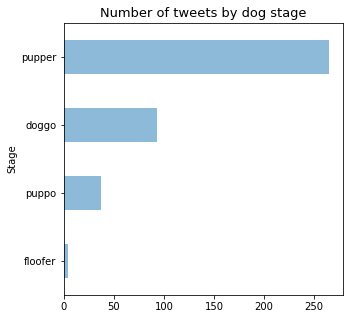

In [ ]:
fig, ax = plt.subplots(figsize=(5,5))
plt.title('Number of tweets by dog stage',fontsize=13)
plt.ylabel('Stage')
C_Archive['Stage'].value_counts(ascending=True).plot(kind="barh",alpha=0.5);


Pupper by far is the most common dog stage.


Text(0.5, 1.0, 'Dog Gender Partitions')

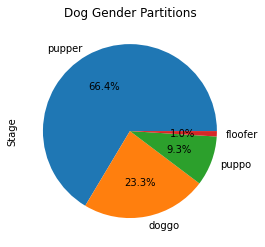

In [ ]:
# Plot the data partitioned by dog gender
C_Archive[C_Archive['Stage'].notnull()]['Stage'].value_counts().plot(kind = 'pie', autopct='%1.1f%%')
plt.title('Dog Gender Partitions')


* Puppers still tie for the lowest median rating numerator. Note that several categories have less than 10 posts (doggo-pupper, floofer, and doggo-puppo). Among the more common categories, doggo and puppo, puppers still underperform.



In [ ]:
# Which gender had high ratings
C_Archive[['Stage', 'rating_numerator']][C_Archive.Stage.notnull()].groupby('Stage').mean()


,rating_numerator
Stage,
doggo,13.688172
floofer,12.250000
pupper,12.758491
puppo,12.108108


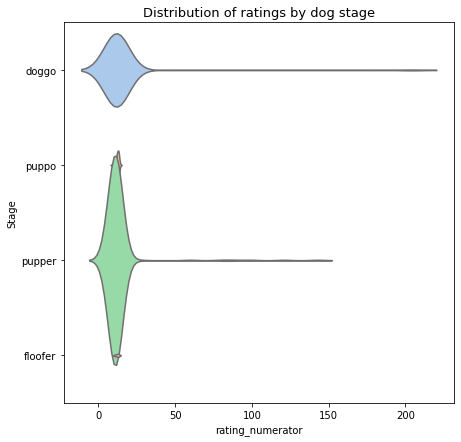

In [ ]:
import seaborn as sb
fig, ax = plt.subplots(figsize=(7,7))
plt.title('Distribution of ratings by dog stage',fontsize=13)
ax = sb.violinplot(y='Stage',x='rating_numerator',data=C_Archive,palette='pastel',scale='count',inner=None,width=2.2)


Have the Ratings of WeRateDogs Been Consistent Through Time?



Besides being a positive rating platform, what does their ratings trend look like? This question is important because, it is important to know when this positive rating was started. If there is consistency in their ratings throughout the years, then they could be deliberately making their ratings positive.

In [ ]:
# Get the original master data
twitter_archive_master = C_Archive

# Get rows having rating numberator values between 6.5 and 16
twitter_archive_master = twitter_archive_master[
    (twitter_archive_master.rating_numerator < 16) & 
    (twitter_archive_master.rating_numerator > 6.5)]

# Get ratings sorted by time
time_vs_rating = C_Archive[
    ['timestamp', 'rating_numerator']].sort_values(by='timestamp')

# For ease of analysis, convert timestamp to date
time_vs_rating.timestamp = time_vs_rating.timestamp

# Group data on similar days togather.
# Represent ratings of the day using their median 
time_vs_rating = time_vs_rating.groupby('timestamp').rating_numerator.median()

# Compute 30 days moving average of ratings
time_vs_rating = time_vs_rating.rolling(window=30).mean()
time_vs_rating.name = ' Average every 30 Days'
time_vs_rating.index = pd.to_datetime(time_vs_rating.index)


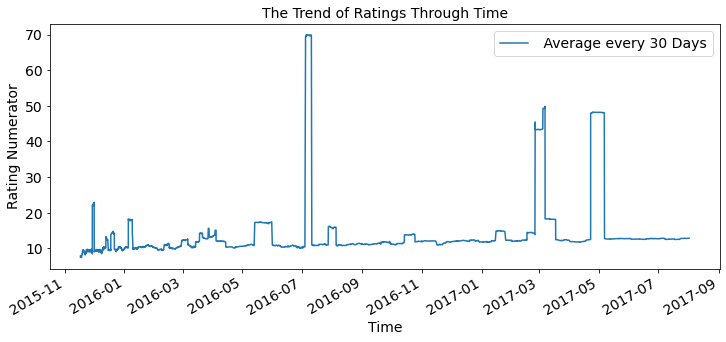

Dogs ratings are positively increasing with time .


In [ ]:

# Plot the time series data
time_vs_rating.plot(figsize=(12,5))
plt.legend(fontsize=14)
plt.title('The Trend of Ratings Through Time', fontsize=14)
plt.ylabel('Rating Numerator', fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.savefig(fname='Ratings_through_time.png')
plt.show();

print('Dogs ratings are positively increasing with time .')
